## 지역별 상위 관광지 찾기

In [1]:
# pip install selenium

In [2]:
# 예제 라이브러리 추가하기
from selenium import webdriver 
import pandas as pd

In [3]:
df = pd.read_excel('./df_season_v2.xlsx') # 12개월 총 입장객 정보필드 추가한 파일
df = df.iloc[:, 1:]
df

,시도,군구,관광지명,01월,02월,03월,04월,05월,06월,07월,...,09월,10월,11월,12월,봄,여름,가을,겨울,합계,관광지_지역포함
0,강원도,원주시,간현관광지 나오라쇼,0,0,0,0,0,0,0,...,0,10195,0,0,0,1566,10195,0,11761,원주시-간현관광지 나오라쇼
1,강원도,태백시,365세이프타운,3799,3061,1193,2949,7232,5384,6909,...,6158,8727,6798,4447,11374,24321,21683,11307,68685,태백시-365세이프타운
2,강원도,홍천군,가리산자연휴양림,3706,3513,2090,4382,6233,6467,9497,...,6726,8568,5370,4181,12705,26199,20664,11400,70968,홍천군-가리산자연휴양림
3,강원도,정선군,가리왕산자연휴양림,3215,2403,662,0,8814,9093,13598,...,7324,10370,2702,1598,9476,39654,20396,7216,76742,정선군-가리왕산자연휴양림
4,강원도,화천군,감성테마문학공원,107,76,140,367,370,278,362,...,164,205,272,79,877,1018,641,262,2798,화천군-감성테마문학공원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,충청북도,옥천군,햇다래마을,13,31,16,46,181,202,281,...,274,31,75,42,243,638,380,86,1347,옥천군-햇다래마을
2279,충청북도,옥천군,향수호수길,3696,4345,3728,1929,4986,5522,4180,...,5362,6624,4339,2571,10643,13610,16325,10612,51190,옥천군-향수호수길
2280,충청북도,청주시,현도오토캠핑장,1997,1732,1741,2469,2534,1783,1049,...,2488,2810,1629,1801,6744,3935,6927,5530,23136,청주시-현도오토캠핑장
2281,충청북도,충주시,활옥동굴,19380,19070,16613,24339,35581,43058,63487,...,29884,40694,22274,16475,76533,180922,92852,54925,405232,충주시-활옥동굴


In [4]:
# 각 권역별 데이터프레임을 받아서
# 월별 상위 탑7 관광지 정보 리턴하는 함수
def get_top_name(dp_area):
    
    dp_area_name = [0]

    for i in range(1, 13):
        if i < 10:
            month_str = '0'+str(i)+'월'
        else:
            month_str = str(i)+'월'
        dp_area_season = dp_area.sort_values(month_str, ascending=False)
        dp_area = dp_area_season[:7]
        dp_area_name.append(list(dp_area['관광지_지역포함']))
    return dp_area_name


In [5]:
# 제주도 월별 상위권 5개 관광지 jeju_top_name[1]~
jeju = df[(df['시도'] == '제주특별자치도')]
jeju_top_name = get_top_name(jeju)

# 수도권(서울, 경기, 인천) 월별 상위권 5개 관광지 sudogun_top_name[1]~
sudogun = df[(df['시도'] == '서울특별시') | (df['시도'] == '경기도') | (df['시도'] == '인천광역시')]
sudogun_top_name = get_top_name(sudogun)

seoul = df[df['시도'] == '서울특별시']
gyeonggi = df[df['시도'] == '경기도']
incheon = df[df['시도'] == '인천광역시']
seoul_top_name = get_top_name(seoul)
gyeonggi_top_name = get_top_name(gyeonggi)
incheon_top_name = get_top_name(incheon)

# 충정권(충청남도, 충청북도, 대전, 세종) 월별 상위권 5개 관광지 chungcheong_top_name[1]~
chungcheong = df[(df['시도'] == '충청남도') | (df['시도'] == '충청북도') | (df['시도'] == '대전광역시') | (df['시도'] == '세종특별자치시')]
chungcheong_top_name = get_top_name(chungcheong)

chungcheong_s = df[df['시도'] == '충청남도']
chungcheong_n = df[df['시도'] == '충청북도']
daejon = df[df['시도'] == '대전광역시']
sejong = df[df['시도'] == '세종특별자치시']
chungcheong_s_top_name = get_top_name(chungcheong_s)
chungcheong_n_top_name = get_top_name(chungcheong_n)
daejon_top_name = get_top_name(daejon)
sejong_top_name = get_top_name(sejong)


# 전라권(전라남도, 전라북도, 광주광역시) 월별 상위권 5개 관광지 geonla_top_name[1]~
geonla = df[(df['시도'] == '전라남도') | (df['시도'] == '전라북도') | (df['시도'] == '광주광역시')]
geonla_top_name = get_top_name(geonla)

geonla_s = df[df['시도'] == '전라남도']
geonla_n = df[df['시도'] == '전라북도']
gwangju = df[df['시도'] == '광주광역시']
geonla_s_top_name = get_top_name(geonla_s)
geonla_n_top_name = get_top_name(geonla_n)
gwangju_top_name = get_top_name(gwangju)


# 경상권(경상남도, 경상북도, 대구광역시, 부산광역시) 월별 상위권 5개 관광지 gyeongsang[1]~
gyeongsang = df[(df['시도'] == '경상남도') | (df['시도'] == '경상북도') | (df['시도'] == '대구광역시') | (df['시도'] == '부산광역시')]
gyeongsang_top_name = get_top_name(gyeongsang)

gyeongsang_s = df[df['시도'] == '경상남도']
gyeongsang_n = df[df['시도'] == '경상북도']
daegu = df[df['시도'] == '대구광역시']
busan = df[df['시도'] == '부산광역시']
ulsan = df[df['시도'] == '울산광역시']
gyeongsang_s_top_name = get_top_name(gyeongsang_s)
gyeongsang_n_top_name = get_top_name(gyeongsang_n)
daegu_top_name = get_top_name(daegu)
busan_top_name = get_top_name(busan)
ulsan_top_name = get_top_name(ulsan)

# 강원도 월별 상위권 5개 관광지 gangwon[1]~
gangwon = df[(df['시도'] == '강원도')]
gangwon_top_name = get_top_name(gangwon)


## tkinter 를 이용한 추천관광지 시연 구현

In [6]:
# pip install ttkthemes

In [7]:
from tkinter import *
import tkinter.ttk as ttk

# 예제2) 버튼만들기
window = Tk()
window.title("여행 어디까지 가봤니?")
window.geometry("610x900")       # 창 크기설정
window.option_add("*Font","HY견고딕 15") # 폰트설정
window.resizable(False, False)  # x, y 창 크기 변경 불가
window.configure(bg = '#B9CCED')

# 함수 정의 (버튼을 누르면 텍스트 내용이 바뀜)
def event():
    if combobox.get() == '월 선택':
        label_text_1.config(text='월을 선택하세요.')
        return
    if combobox2.get() == '지역 선택':
        label_text_1.config(text='지역을 선택하세요.')
        return
    
    # 선택 지역 이름
    combo2_val = combobox2.get()

    # 기존 라벨 정보 지우기
    label_text_1.config(text='')
    label_text_2.config(text='')

    # # 월 조회하여 결과 반환하기
    month_var = combobox.get()
    month_var = month_var.split('월')
    month_int = int(month_var[0])

    a = str(month_int) + '월 [' + combo2_val + '] 추천드립니다.'
    b = ''

    # 권역별로 시/도별 관광지 탑 7개 추천
    if combo2_val == '수도권':
        a = a + '\n\n[서울특별시]\n' + str('\n'.join(seoul_top_name[month_int]))
        a = a + '\n\n[경기도]\n' + str('\n'.join(gyeonggi_top_name[month_int]))
        b = b + '\n\n[인천광역시]\n' + str('\n'.join(incheon_top_name[month_int]))

    elif combo2_val == '충청권':
        a = a + '\n\n[충청남도]\n' + str('\n'.join(chungcheong_n_top_name[month_int]))
        a = a + '\n\n[대전광역시]\n' + str('\n'.join(daejon_top_name[month_int]))
        b = b + '\n\n[충청북도]\n' + str('\n'.join(chungcheong_n_top_name[month_int]))
        b = b + '\n\n[세종특별자치시]\n' + str('\n'.join(sejong_top_name[month_int]))

    elif combo2_val == '강원도':
        a = a + '\n\n[강원도]\n' + str('\n'.join(gangwon_top_name[month_int]))

    elif combo2_val == '전라권':
        a = a + '\n\n[전라남도]\n' + str('\n'.join(geonla_s_top_name[month_int]))
        a = a + '\n\n[전라북도]\n' + str('\n'.join(geonla_n_top_name[month_int]))
        b = b + '\n\n[광주광역시]\n' + str('\n'.join(gwangju_top_name[month_int]))

    elif combo2_val == '경상권':
        a = a + '\n\n[경상남도]\n' + str('\n'.join(gyeongsang_s_top_name[month_int]))
        a = a + '\n\n[부산광역시]\n' + str('\n'.join(busan_top_name[month_int]))
        b = b + '\n\n[경상북도]\n' + str('\n'.join(gyeongsang_n_top_name[month_int]))
        b = b + '\n\n[대구광역시]\n' + str('\n'.join(daegu_top_name[month_int]))
        a = a + '\n\n[울산광역시]\n' + str('\n'.join(ulsan_top_name[month_int]))

    elif combo2_val == '제주도':
        a = a + '\n\n[제주도]\n' + str('\n'.join(jeju_top_name[month_int]))
   
    # 추천정보 텍스트로 보여주기
    label_text_1.config(text=a)
    label_text_2.config(text=b)

# 상단 이미지 및 콤보상자/라벨 표시
photo = PhotoImage(file='./ppt앞표지사진.png')
label1 = Label(window,text='😀 몇월에 여행가고 싶으신가요? 선택해주세요 😊', bd='3', fg='black', relief='sunken', image=photo, compound='center')
label1.config(width=600, height=250)
label1.grid(row=0, column=0)    
    
# 가고싶은 월
com_val = []
for i in range(1, 13):
    com_val.append(str(i) + '월')

# 월 선택 콤보상자    
combobox = ttk.Combobox(window)       # window라는 창에 콤보박스 생성
combobox.config(width=10, justify='left')   # 높이 설정
combobox.config(values=com_val)           # 나타낼 항목 리스트(a) 설정
combobox.config(state="readonly")   # 콤보 박스에 사용자가 직접 입력 불가
combobox.set("월 선택")           # 맨 처음 나타낼 값 설정
combobox.grid(row=1, column=0, pady=10)
combobox.place(x=50, y=80)

# 권역 선택 콤보상자
com_val2 = ['수도권', '충청권', '강원도', '전라권', '경상권', '제주도']
combobox2 = ttk.Combobox(window)       # window라는 창에 콤보박스 생성
combobox2.config(width=10, justify='left')   # 높이 설정
combobox2.config(values=com_val2)           # 나타낼 항목 리스트(a) 설정
combobox2.config(state="readonly")   # 콤보 박스에 사용자가 직접 입력 불가
combobox2.set("지역 선택")           # 맨 처음 나타낼 값 설정
combobox2.grid(row=1, column=0, pady=10)
combobox2.place(x=220, y=80)

# 결과보기 버튼
button1 = Button(window,text='결과보기',command=event)
button1.config(width=10, justify='right', bg='snow', relief= 'groove')  
button1.grid(row=1, column=0, pady=10)
button1.place(x=380, y=75)

# 결과 라벨 1/2 
label_text_1 = Label(window,text='', justify=LEFT, 
                    font=('맑은 고딕',12),
                    #bg='#ffffe0',
                    fg='black', bg='#B9CCED'
                    )
label_text_2 = Label(window,text='', justify=LEFT, 
#                    width=200,
                    font=('맑은 고딕',12),
                    #bg='#ffffe0', 
                    fg='black', bg='#B9CCED'
                    )

label_text_1.grid(row=4, column=1, padx=5,pady=10)
label_text_2.grid(row=4, column=2, padx=5,pady=10)
label_text_1.place(x=10, y=260)
label_text_2.place(x=310, y=260)

# 4. 메인루프 실행
window.mainloop()

# 권역별 20위 계절별 관광지 - 차트로 나타내기

In [8]:
# 각 지역별 입장객 합계 기준으로 내림차순 정렬
total_s_sudogun = sudogun.sort_values('합계', ascending=False).reset_index(drop=True)
total_s_chungcheong = chungcheong.sort_values('합계', ascending=False).reset_index(drop=True)
total_s_gangwon = gangwon.sort_values('합계', ascending=False).reset_index(drop=True)
total_s_jeju = jeju.sort_values('합계', ascending=False).reset_index(drop=True)
total_s_geonla = geonla.sort_values('합계', ascending=False).reset_index(drop=True)
total_s_gyeongsang = gyeongsang.sort_values('합계', ascending=False).reset_index(drop=True)

In [9]:
# 그래프 그리기 위한 matplotlib import
import matplotlib.pyplot as plt

In [10]:
import warnings
warnings.filterwarnings(action='ignore')

In [11]:
# matplotlib 한글 폰트 오류 문제 해결
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib

# 폰트의 경로를 통해 사용할 폰트 (맑은고딕)를 지정한다.
matplotlib.rcParams['font.family'] = 'malgun Gothic'   # '맑은 고딕'으로 설정 
matplotlib.rcParams['axes.unicode_minus'] = False     # 한글 폰트를 지정한 후 그래프에서 마이너스(-) 폰트가 깨지는 것을 막아줌

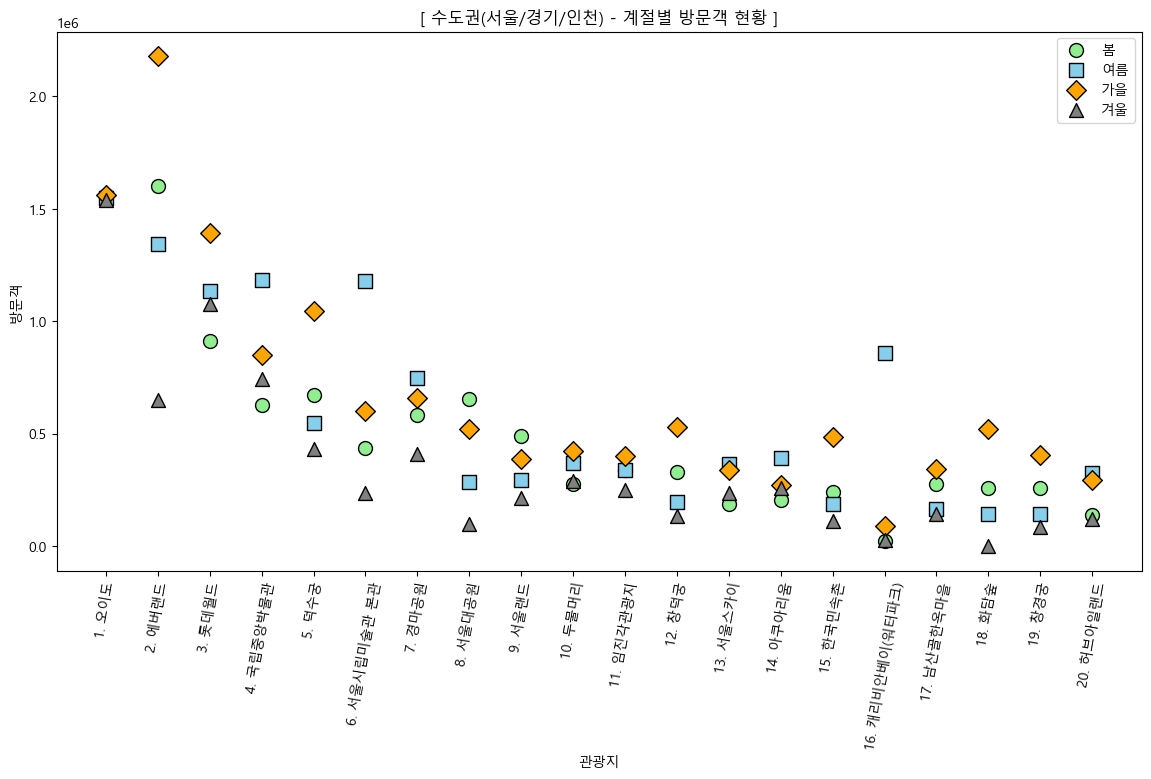

In [12]:
# 1.수도권 - 계절별 그래프 그리기 (입장객 합계 상위 20위)
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,7))

# x축 눈금 라벨 회전하기
plt.xticks(rotation=80)

# x, y축 데이터를 plot 함수에 입력
new_xticker = total_s_sudogun[:20]['관광지명']
new_xticker2 = [str(i+1) + '. ' + val for i, val in enumerate(new_xticker)]

season_list = [['봄', 'o', 'lightgreen'], ['여름', 's', 'skyblue'], 
               ['가을', 'D', 'orange'], ['겨울', '^', 'gray']]

# 계절별 각각 마커모양, 색상 지정하여 그리기
for val in season_list:
    plt.scatter(new_xticker2, total_s_sudogun[:20][val[0]],
            marker=val[1],
            s=100,
            c=val[2],
            edgecolors='black')


# 차트 제목 추가
plt.title("[ 수도권(서울/경기/인천) - 계절별 방문객 현황 ]")

# 축이름 추가
plt.xlabel("관광지")
plt.ylabel("방문객")
#범례 표시
plt.legend(labels=["봄", "여름", "가을", "겨울"])

# 그래프 출력
plt.show()

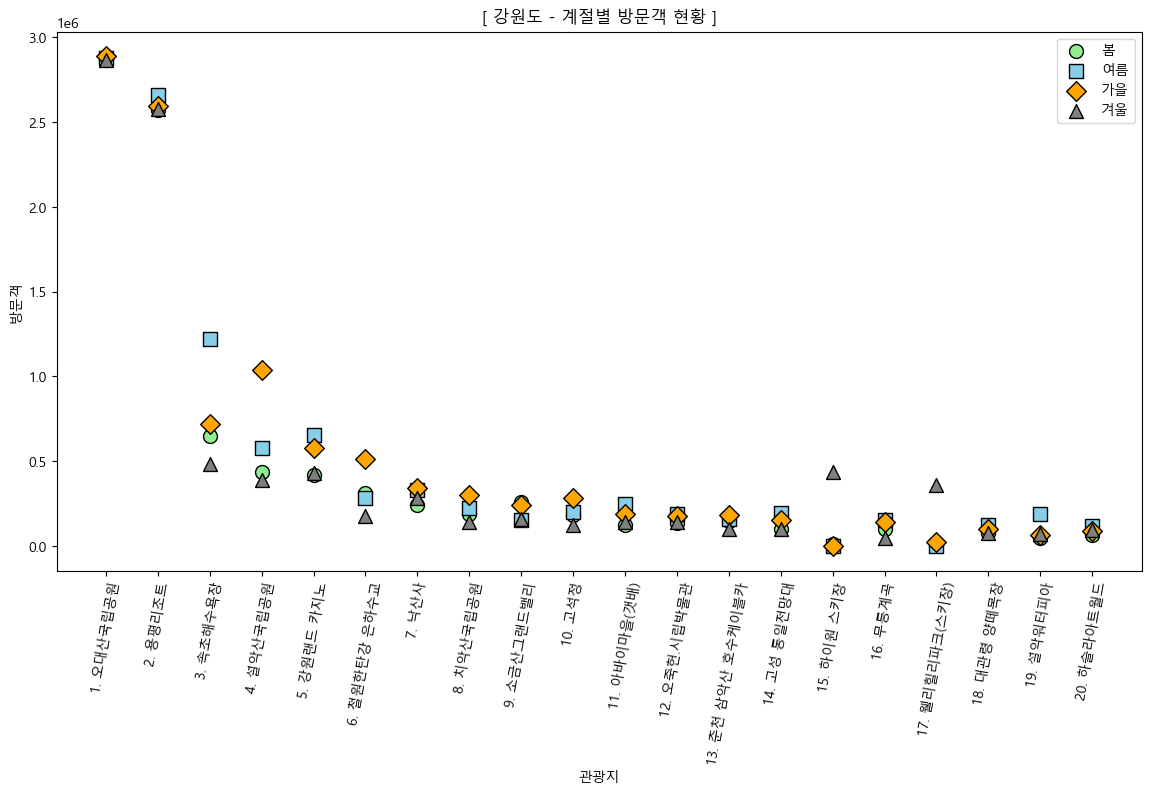

In [13]:
# 2.강원도 - 계절별 그래프 그리기 (입장객 합계 상위 20위)
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,7))

# x축 눈금 라벨 회전하기
plt.xticks(rotation=80)

# x, y축 데이터를 plot 함수에 입력
new_xticker = total_s_gangwon[:20]['관광지명']
new_xticker2 = [str(i+1) + '. ' + val for i, val in enumerate(new_xticker)]

season_list = [['봄', 'o', 'lightgreen'], ['여름', 's', 'skyblue'], 
               ['가을', 'D', 'orange'], ['겨울', '^', 'gray']]

# 계절별 각각 마커모양, 색상 지정하여 그리기
for val in season_list:
    plt.scatter(new_xticker2, total_s_gangwon[:20][val[0]],
            marker=val[1],
            s=100,
            c=val[2],
            edgecolors='black')


# 차트 제목 추가
plt.title("[ 강원도 - 계절별 방문객 현황 ]")

# 축이름 추가
plt.xlabel("관광지")
plt.ylabel("방문객")
#범례 표시
plt.legend(labels=["봄", "여름", "가을", "겨울"])

# 그래프 출력
plt.show()

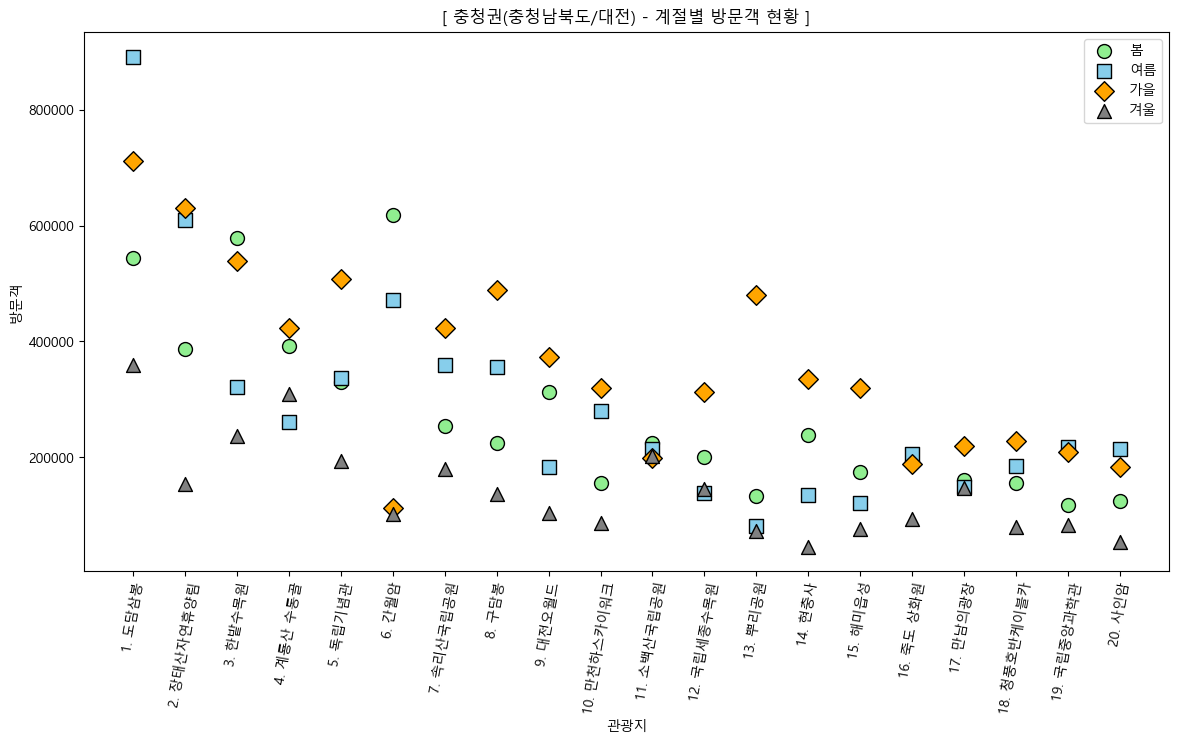

In [14]:
# 3.충청권 - 계절별 그래프 그리기 (입장객 합계 상위 20위)
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,7))

# x축 눈금 라벨 회전하기
plt.xticks(rotation=80)

# x, y축 데이터를 plot 함수에 입력
new_xticker = total_s_chungcheong[:20]['관광지명']
new_xticker2 = [str(i+1) + '. ' + val for i, val in enumerate(new_xticker)]

season_list = [['봄', 'o', 'lightgreen'], ['여름', 's', 'skyblue'], 
               ['가을', 'D', 'orange'], ['겨울', '^', 'gray']]

# 계절별 각각 마커모양, 색상 지정하여 그리기
for val in season_list:
    plt.scatter(new_xticker2, total_s_chungcheong[:20][val[0]],
            marker=val[1],
            s=100,
            c=val[2],
            edgecolors='black')


# 차트 제목 추가
plt.title("[ 충청권(충청남북도/대전) - 계절별 방문객 현황 ]")

# 축이름 추가
plt.xlabel("관광지")
plt.ylabel("방문객")
#범례 표시
plt.legend(labels=["봄", "여름", "가을", "겨울"])

# 그래프 출력
plt.show()

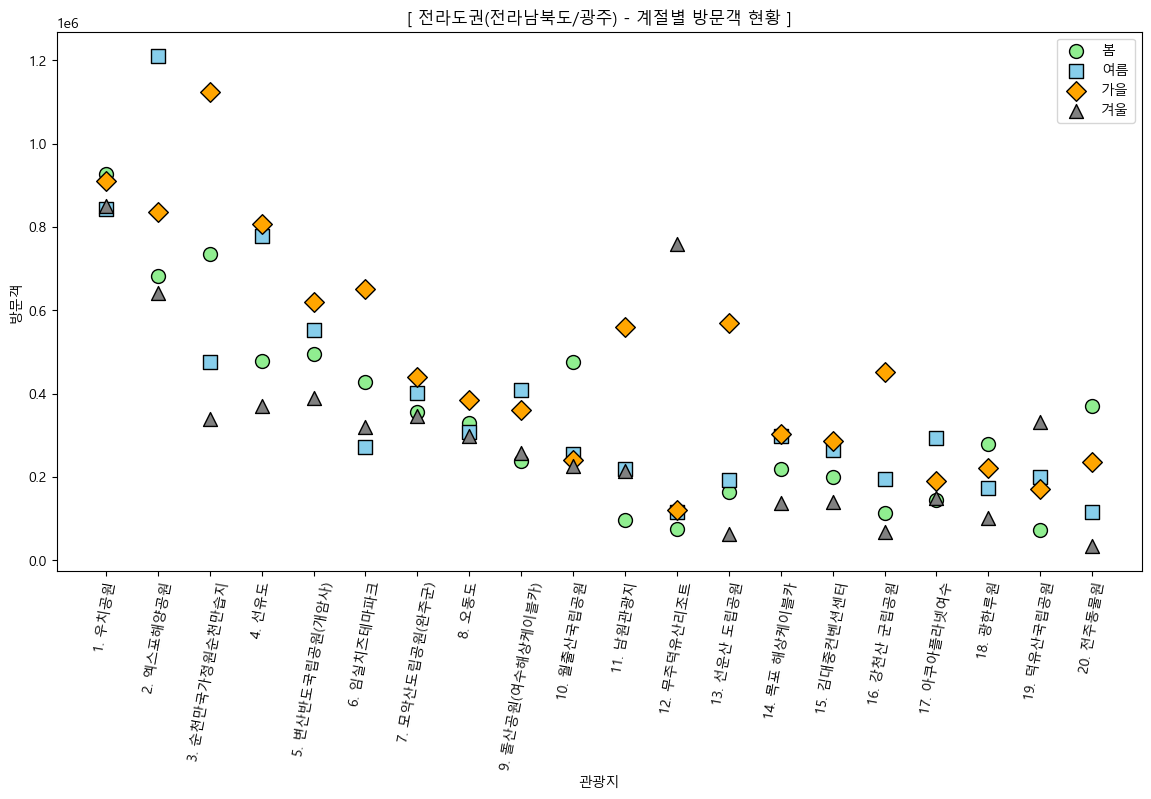

In [15]:
# 4.전라도권 - 계절별 그래프 그리기 (입장객 합계 상위 20위)
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,7))

# x축 눈금 라벨 회전하기
plt.xticks(rotation=80)

# x, y축 데이터를 plot 함수에 입력
new_xticker = total_s_geonla[:20]['관광지명']
new_xticker2 = [str(i+1) + '. ' + val for i, val in enumerate(new_xticker)]

season_list = [['봄', 'o', 'lightgreen'], ['여름', 's', 'skyblue'], 
               ['가을', 'D', 'orange'], ['겨울', '^', 'gray']]

# 계절별 각각 마커모양, 색상 지정하여 그리기
for val in season_list:
    plt.scatter(new_xticker2, total_s_geonla[:20][val[0]],
            marker=val[1],
            s=100,
            c=val[2],
            edgecolors='black')


# 차트 제목 추가
plt.title("[ 전라도권(전라남북도/광주) - 계절별 방문객 현황 ]")

# 축이름 추가
plt.xlabel("관광지")
plt.ylabel("방문객")
#범례 표시
plt.legend(labels=["봄", "여름", "가을", "겨울"])

# 그래프 출력
plt.show()

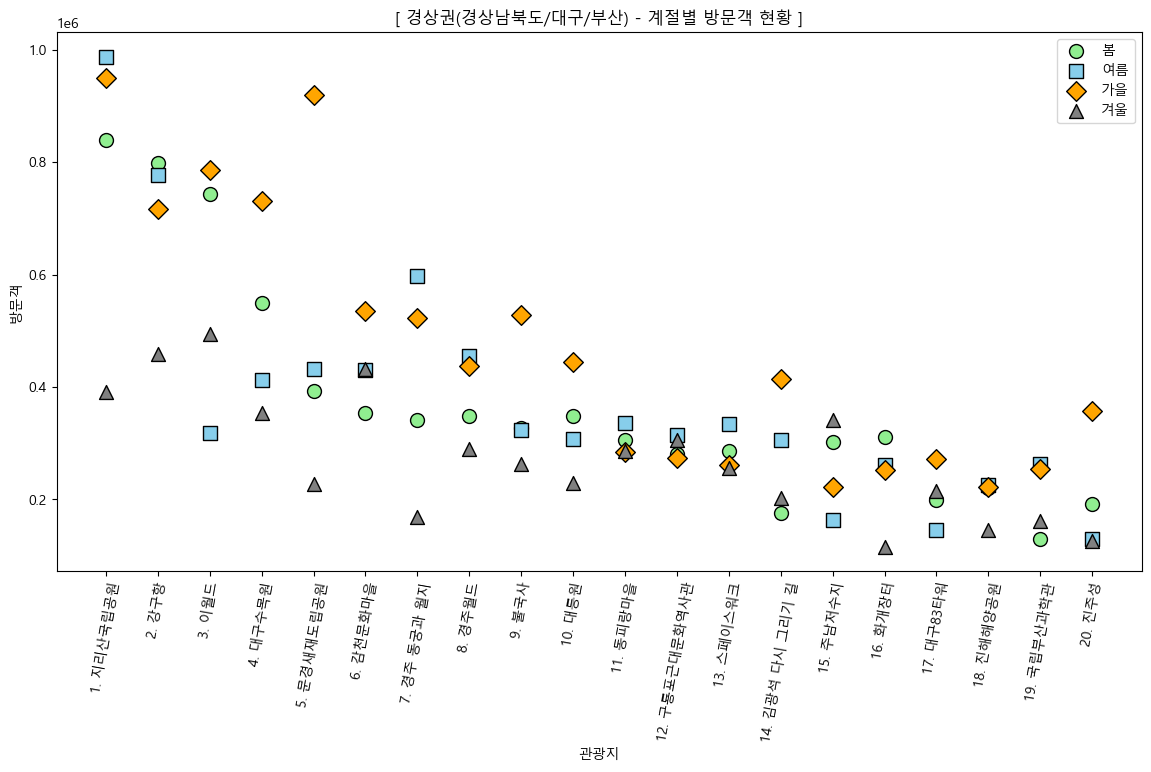

In [16]:
# 5.경상권 - 계절별 그래프 그리기 (입장객 합계 상위 20위)
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,7))

# x축 눈금 라벨 회전하기
plt.xticks(rotation=80)

# x, y축 데이터를 plot 함수에 입력
new_xticker = total_s_gyeongsang[:20]['관광지명']
new_xticker2 = [str(i+1) + '. ' + val for i, val in enumerate(new_xticker)]

season_list = [['봄', 'o', 'lightgreen'], ['여름', 's', 'skyblue'], 
               ['가을', 'D', 'orange'], ['겨울', '^', 'gray']]

# 계절별 각각 마커모양, 색상 지정하여 그리기
for val in season_list:
    plt.scatter(new_xticker2, total_s_gyeongsang[:20][val[0]],
            marker=val[1],
            s=100,
            c=val[2],
            edgecolors='black')


# 차트 제목 추가
plt.title("[ 경상권(경상남북도/대구/부산) - 계절별 방문객 현황 ]")

# 축이름 추가
plt.xlabel("관광지")
plt.ylabel("방문객")
#범례 표시
plt.legend(labels=["봄", "여름", "가을", "겨울"])

# 그래프 출력
plt.show()

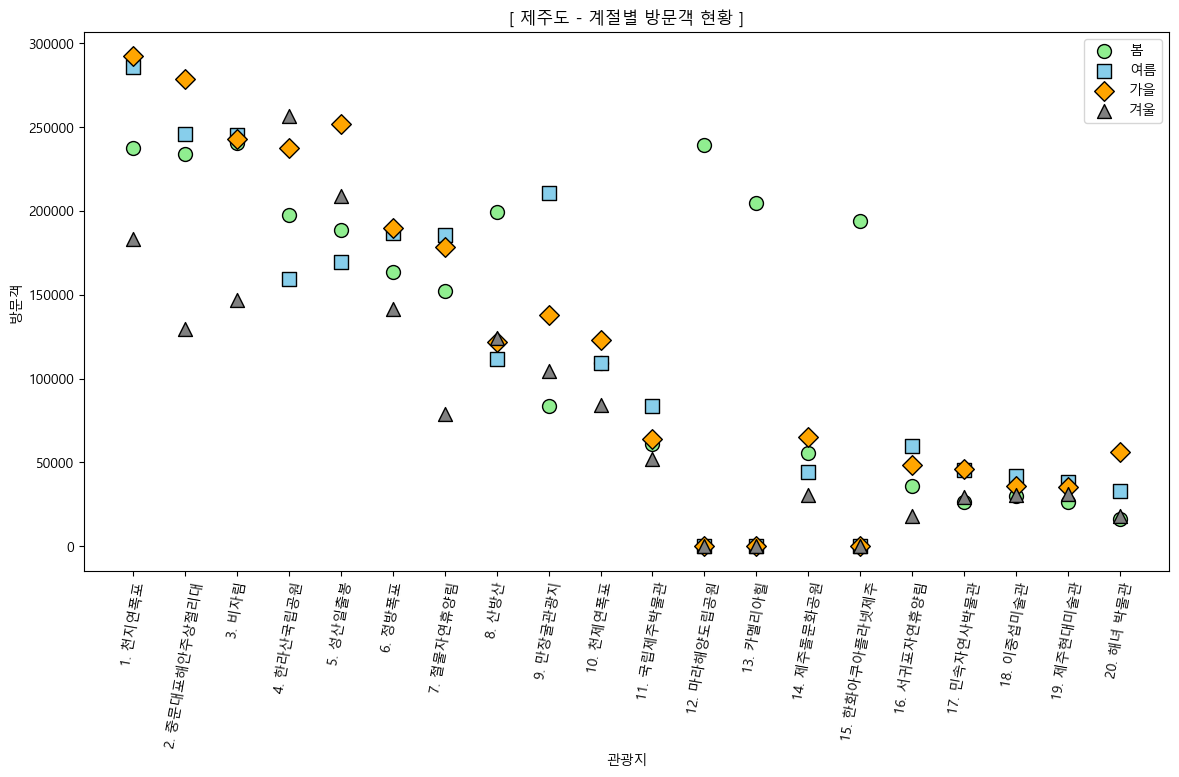

In [17]:
# 6.제주도 - 계절별 그래프 그리기 (입장객 합계 상위 20위)
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,7))

# x축 눈금 라벨 회전하기
plt.xticks(rotation=80)

# x, y축 데이터를 plot 함수에 입력
new_xticker = total_s_jeju[:20]['관광지명']
new_xticker2 = [str(i+1) + '. ' + val for i, val in enumerate(new_xticker)]

season_list = [['봄', 'o', 'lightgreen'], ['여름', 's', 'skyblue'], 
               ['가을', 'D', 'orange'], ['겨울', '^', 'gray']]

# 계절별 각각 마커모양, 색상 지정하여 그리기
for val in season_list:
    plt.scatter(new_xticker2, total_s_jeju[:20][val[0]],
            marker=val[1],
            s=100,
            c=val[2],
            edgecolors='black')


# 차트 제목 추가
plt.title("[ 제주도 - 계절별 방문객 현황 ]")

# 축이름 추가
plt.xlabel("관광지")
plt.ylabel("방문객")
#범례 표시
plt.legend(labels=["봄", "여름", "가을", "겨울"])

# 그래프 출력
plt.show()